## High and Low Pass Filters

Now, you might be wondering, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain!

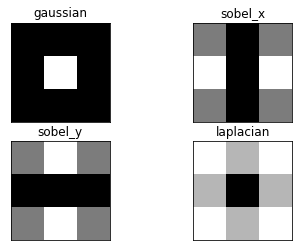

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (all edge, regardless of orientation) filter, should block out low-frequencies!

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.

4


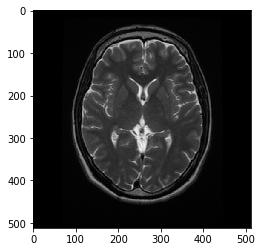

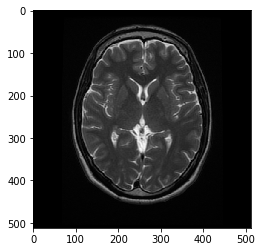

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob # library for loading images from a directory
import cv2
import os
import numpy as np
## TODO: load in an image, and filter it using a kernel of your choice
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    
        
    # Iterate through each image file in each image_type folder
    # glob reads in any image with the extension "image_dir/im_type/*"
    for file in glob.glob(os.path.join(image_dir, "*")):
            
        # Read in the image
        im = mpimg.imread(file)

        # Check if the image exists/if it's been correctly read-in
        if not im is None:
            # Append the image, and it's type (red, green, yellow) to the image list
            im_list.append((im))
    
    return im_list




IMAGE_LIST = load_dataset('images')

## apply a fourier transform to the original *and* filtered images and compare them
print(len(IMAGE_LIST))
selected_image = IMAGE_LIST[0]
plt.imshow(selected_image)
plt.show()
gray = cv2.cvtColor(selected_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

filter_select = laplacian


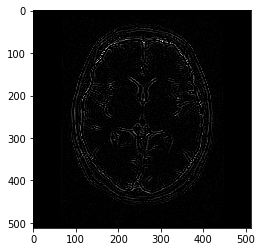

In [39]:
filtered_gaus1 = cv2.filter2D(gray, -1, filter_select)
plt.imshow(filtered_gaus1, cmap='gray')
plt.show()

999


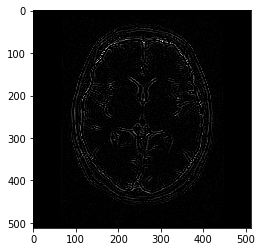

In [40]:
for i in range(0,1000):  
    filtered_gaus = cv2.filter2D(gray, -1, filter_select)
print(i)  
plt.imshow(filtered_gaus, cmap='gray')
plt.show()

In [41]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [42]:
print("similarity when apply filter 1000 times vs one time:")
print(mse(filtered_gaus,filtered_gaus1))

similarity when apply filter 1000 times vs one time:
0.0


1.0


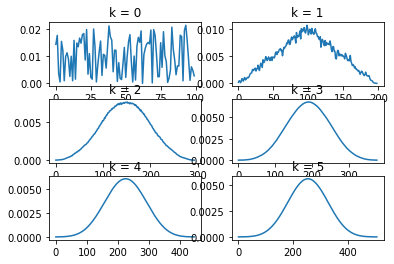

In [43]:

#TAKEAWAY :APPLYING ANY LOW PASS FILTER INFINITE TIMES => APPLYING A GAUSSIAN FILTER
#          APPLYING A GAUSSIAN FILTER INFINITE TIMES => APPLYING A GAUSSIAN FILTER

        

import numpy as np

# generate a random low pass filter
F = np.random.randint(0,1000,(100,1) ).astype('float').ravel()
# ensures sum to 1
F = F / np.sum(F)
print ( np.sum(F))
# create copy to buffer the last version of convolving F for k times
Fk = F.copy()
Fk_list = []
for k in range( 5 ) :
    Fk = np.convolve( Fk, F, 'full' )
    Fk = Fk / np.sum(Fk)
    # donot worry about this line, see comments below
    #Fk = np.asarray( filter( lambda x : x > 1e-6, Fk ) )
    Fk = Fk[ (Fk > 1e-6)]
    Fk = Fk / np.sum(Fk)
    Fk_list.append( Fk )
# plot results
f, axarr = plt.subplots( 3, 2 );
# plot data
axarr[0,0].plot( F ),
axarr[0,0].set_title( 'k = 0' );
axarr[0,1].plot( Fk_list[0] ),
axarr[0,1].set_title( 'k = 1' );
axarr[1,0].plot( Fk_list[1] ),
axarr[1,0].set_title( 'k = 2' );
axarr[1,1].plot( Fk_list[2] ),
axarr[1,1].set_title( 'k = 3' );
axarr[2,0].plot( Fk_list[3] ),
axarr[2,0].set_title( 'k = 4' );
axarr[2,1].plot( Fk_list[4] ),
axarr[2,1].set_title( 'k = 5' );
plt.show();

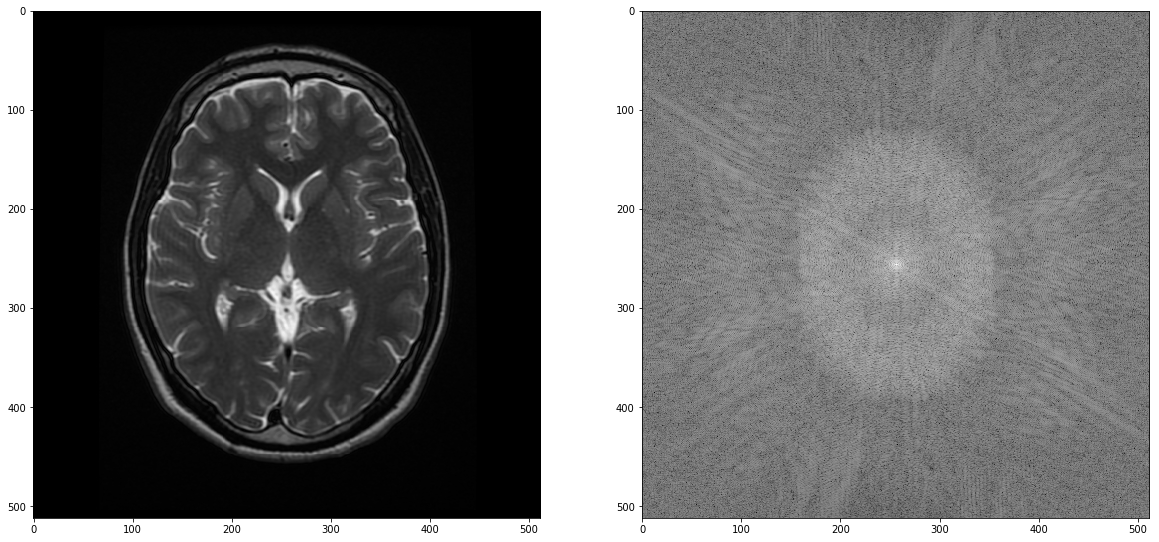

In [44]:
# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx


norm = filtered_gaus1/255
Ft = ft_image(norm)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(selected_image)
ax2.imshow(Ft, cmap='gray')